Evaluating Processed Play Data
==============================

This notebook will use the xgboost library to explore the processed and targeted data stored in the "data/processed/plays_and_targets_week1.csv". In this notebook, I'll be doing some initial evaluation of models and features.

In [33]:
from xgboost import XGBClassifier

import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, precision_score

import seaborn as sns
import matplotlib.pyplot as plt

# open processed pre-snap data, confirm that shape and columns look correct
df_pre = pd.read_csv("../data/processed/plays_and_targets_week_1.csv")

sample_size = 400

# reduce training set to only defense successes
df_success = df_pre[ df_pre['defenseTarget'] == 1 ]
df_success_sample = df_success.sample(sample_size)

df_nonsuccess = df_pre[ df_pre['defenseTarget' ] == 0 ]
df_nonsuccess_sample = df_nonsuccess.sample(sample_size)

df = pd.concat([df_success_sample, df_nonsuccess_sample])

print(f"Shape:   {df.shape}")
print(f"Columns: {df.columns.values}")

Shape:   (800, 10)
Columns: ['gameId' 'playId' 'maxOffenseSpeed' 'maxDefenseSpeed'
 'offenseDistanceTraveled' 'defenseDistanceTraveled' 'elapsedTime'
 'offenseTarget' 'defenseTarget' 'targetDiff']


In [34]:
features = ['maxOffenseSpeed', 'maxDefenseSpeed', 'offenseDistanceTraveled', 'defenseDistanceTraveled', 'elapsedTime']
target = 'defenseTarget'

# split the data into train and test sections
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[features], 
                                                                    df[target], 
                                                                    test_size = .2)

# create the classifier model and then fit the model
boost = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
# make predictions on the X_test dataset
y_preds = boost.predict(X_test)

# Extract true positives (TP) and false positives (FP) from the confusion matrix
TP = cm[1, 1]
FP = cm[0, 1]

# Calculate precision
precision = TP / (TP + FP)

print(f"Precision: {precision}")

Precision: 0.43037974683544306


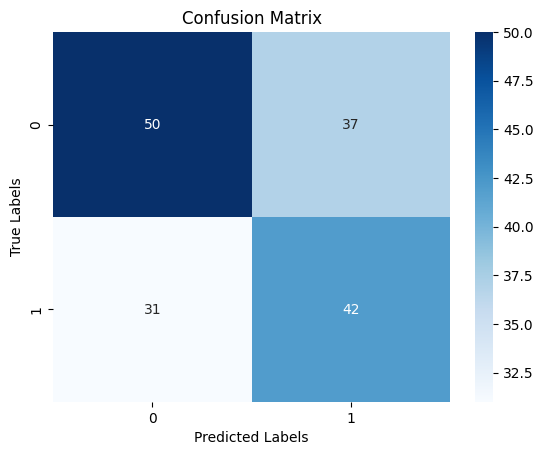

In [36]:
# calculate the confusion matrix to understand the model accuracy
cm = confusion_matrix(y_test, y_preds)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()